In [231]:
import matplotlib.pyplot as plt
import numpy as np

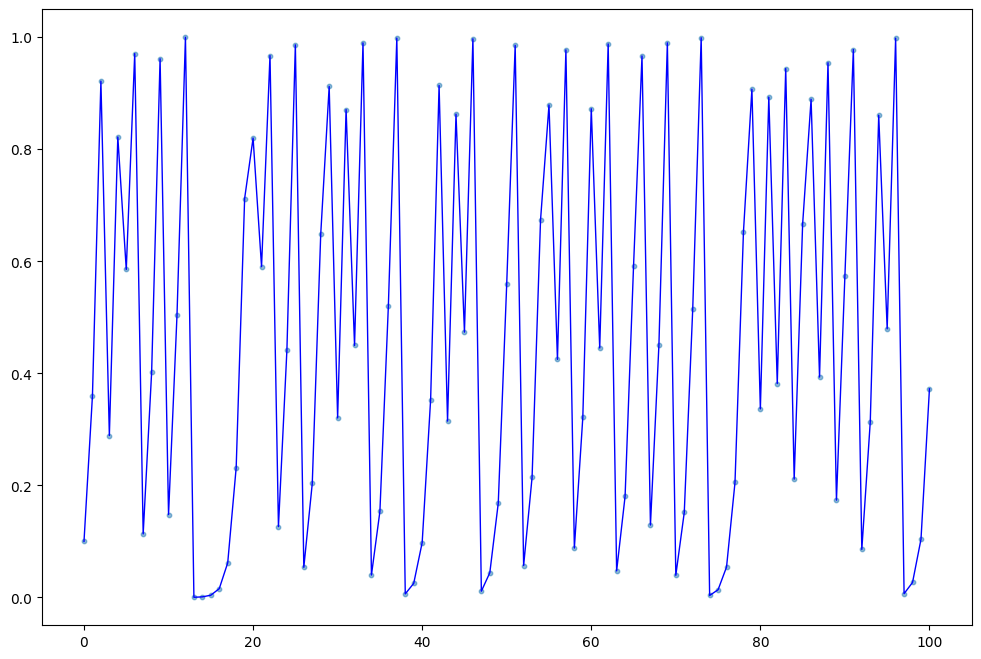

In [232]:
def ExpModel(n, r, x0 ):    
    x = [x0]
    for _ in range(n):
        xi = x[-1]*r
        x.append(xi)
    return x

def LogModel(n, r, x0):
    x = [x0]    
    for _ in range(n):
        x.append(r * x[-1] * (1 - x[-1]))    
    return x


def MoranModel(n, r, x0):
    x = [x0]    
    for _ in range(n):
        x.append(x[-1] * np.exp(r * (1 - x[-1])))    
    return x

def ParasiteModel(n, a, b, c, x0, y0):
    x = [x0]
    y = [y0]    
    for _ in range(n):
        xCurr = x[-1]
        yCurr = y[-1]        
        xNext = b * xCurr * np.exp(-a * yCurr)
        yNext = c * xCurr * (1 - np.exp(-a * yCurr))        
        x.append(xNext)
        y.append(yNext)
    
    return x, y

n = 100
fig, ax = plt.subplots(figsize=(12, 8))
#plt.yscale('log')

#x = LogModel(n, 3.6, 0.1)
x = LogModel(n, 4, 0.1)
ax.plot(np.arange(len(x)), x, 'b-', linewidth=1)
#print( x)
plt.scatter(list(i for i in range(n+1)), x, s=10, alpha=0.5)

    

In [338]:
def MyPairPlot(params, funcModel, Rtype = "n"):
    
    fig, axes = plt.subplots(len(params), 5, figsize=(15, 12))
    if (Rtype == "n"):
        Klist = [10, 20, 50, 100, 200]
    elif(Rtype == "x0"):
        Klist = [0.1, 0.5, 0.8, 0.9, 1.5]
    
    for row, (r, x0) in enumerate(params):
        for col, k in enumerate(Klist):
            if Rtype == "n":
                n = k
            elif Rtype == "x0":
                n = 100
                x0 = k            
            x = funcModel(n, r, x0)
            t = np.arange(len(x))        
            ax = axes[row, col]
            ax.plot(t, x, 'b', linewidth=1)
            ax.scatter(t, x, s=10, alpha=0.5)                
            if col == 0:
                ax.set_ylabel(f'r={r}, x0={x0}')        
            ax.grid(True, alpha=0.2)
    plt.show()




# Исследуем на разных параметрах

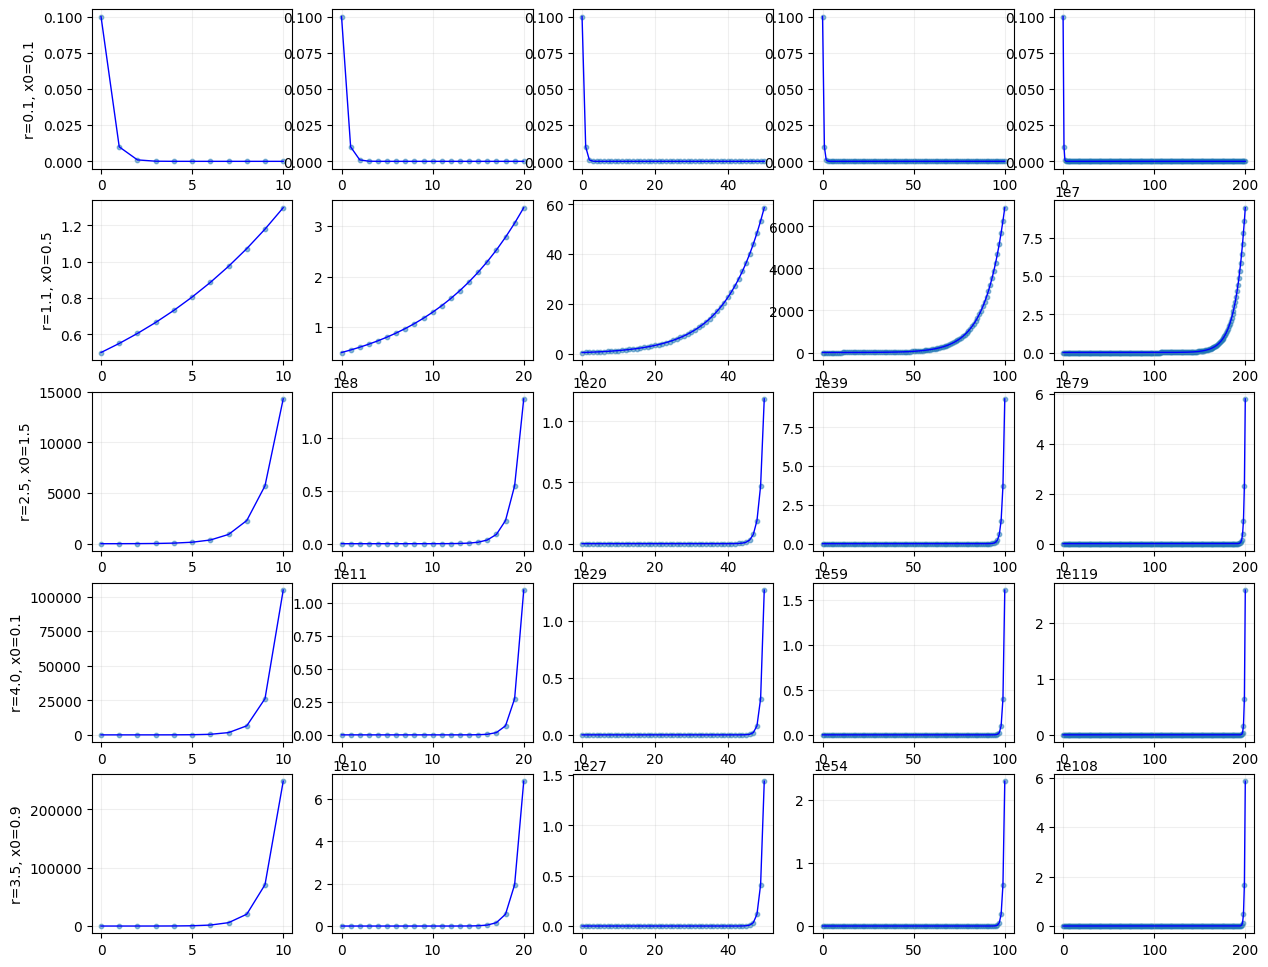

In [337]:

params = [
    (0.1, 0.1),
    (1.1, 0.5),
    (2.5, 1.5),
    (4.0, 0.1),
    (3.5, 0.9)
]


n = 100    
MyPairPlot(params, ExpModel, "n")

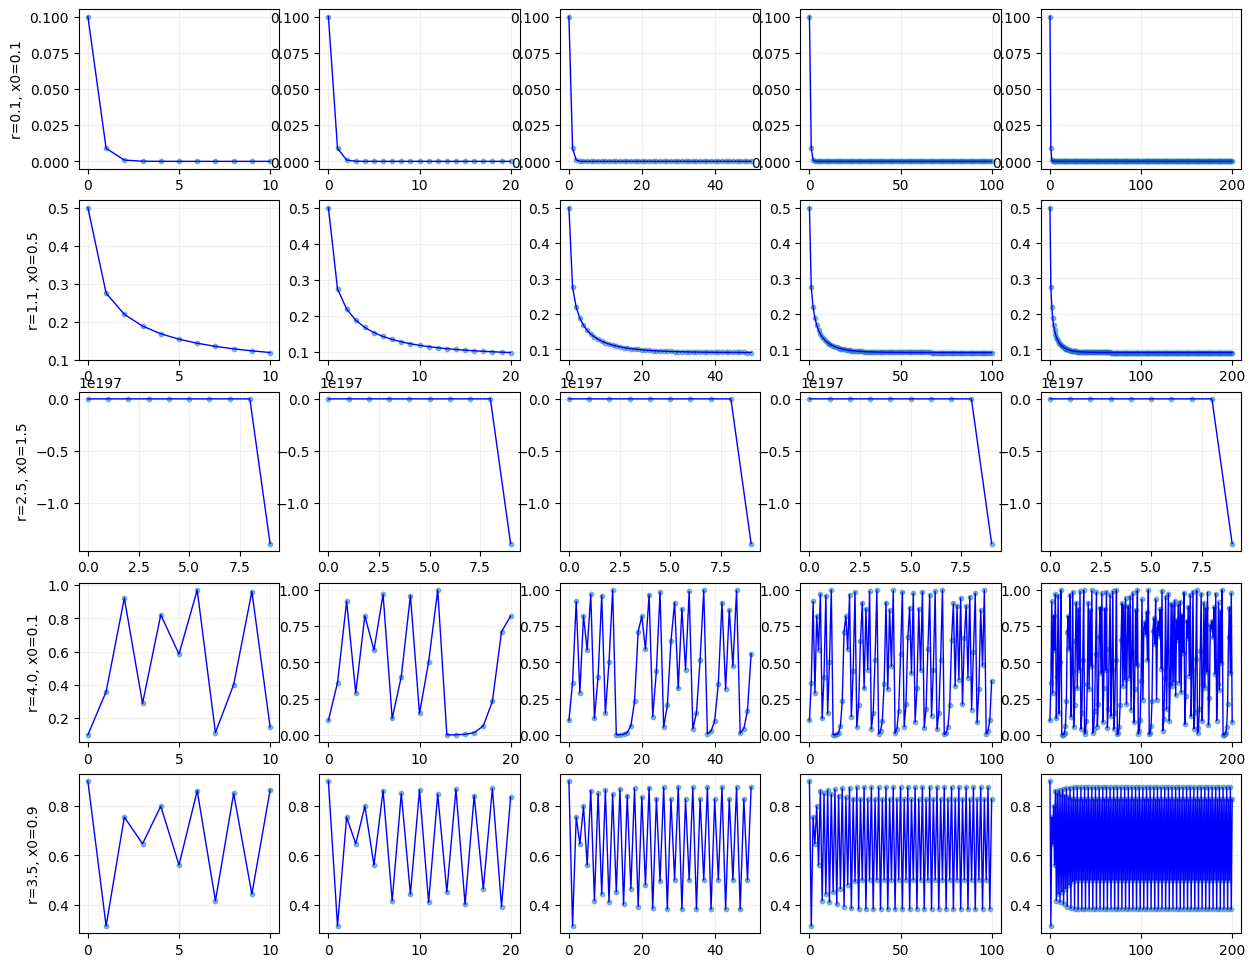

In [235]:
MyPairPlot(params, LogModel, )

# Исследование от начального значения

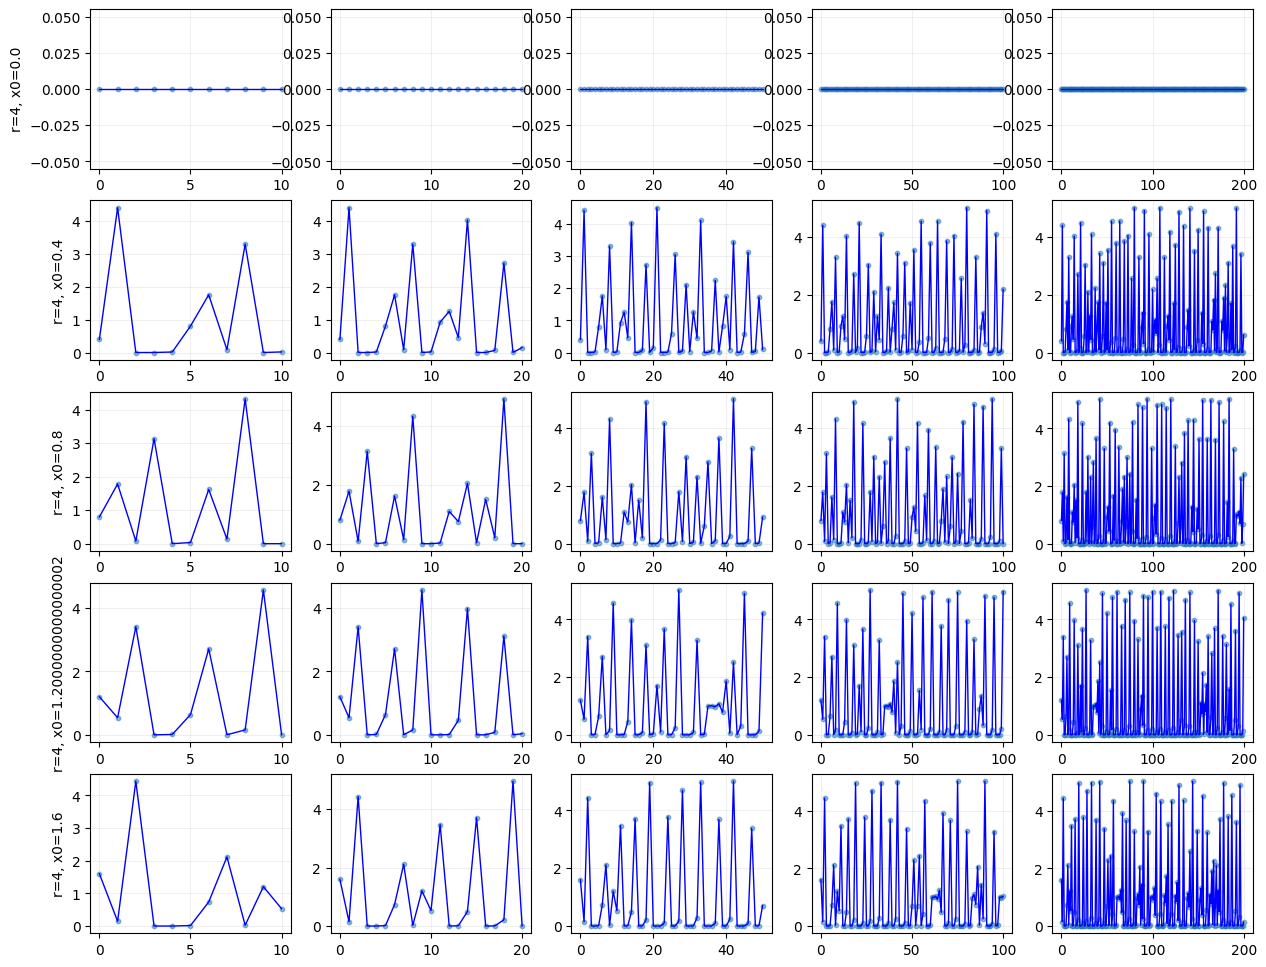

In [236]:
params = list((4, x*0.4) for x in range(5)) # 


MyPairPlot(params, MoranModel)

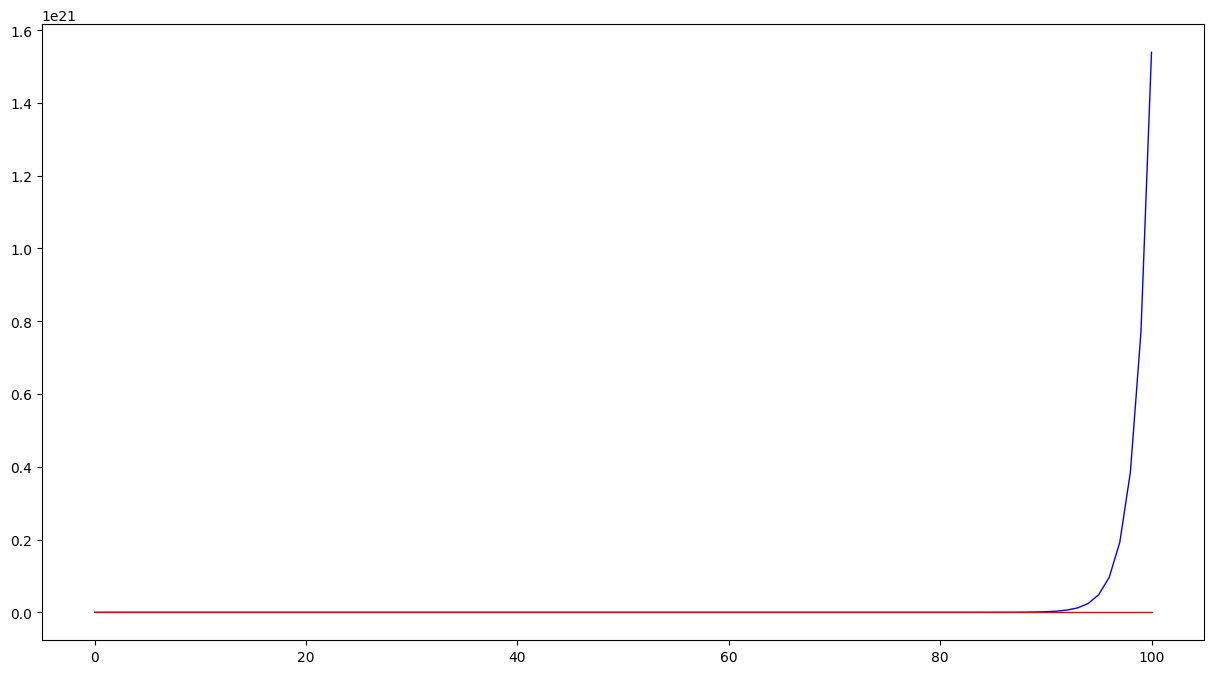

In [335]:
b = 2.0
a = 0.1
c = 1.0
x0 = 10
y0 = 5
n = 100
t = np.arange(len(x))

x, y = ParasiteModel(n, a, b, c, x0, y0)


fig, ax = plt.subplots(figsize=(15, 8))
axes.grid(True, alpha=0.3)
plt.plot(t,x, "b", linewidth=1)
plt.plot(t,y, "r", linewidth=1)
plt.show()

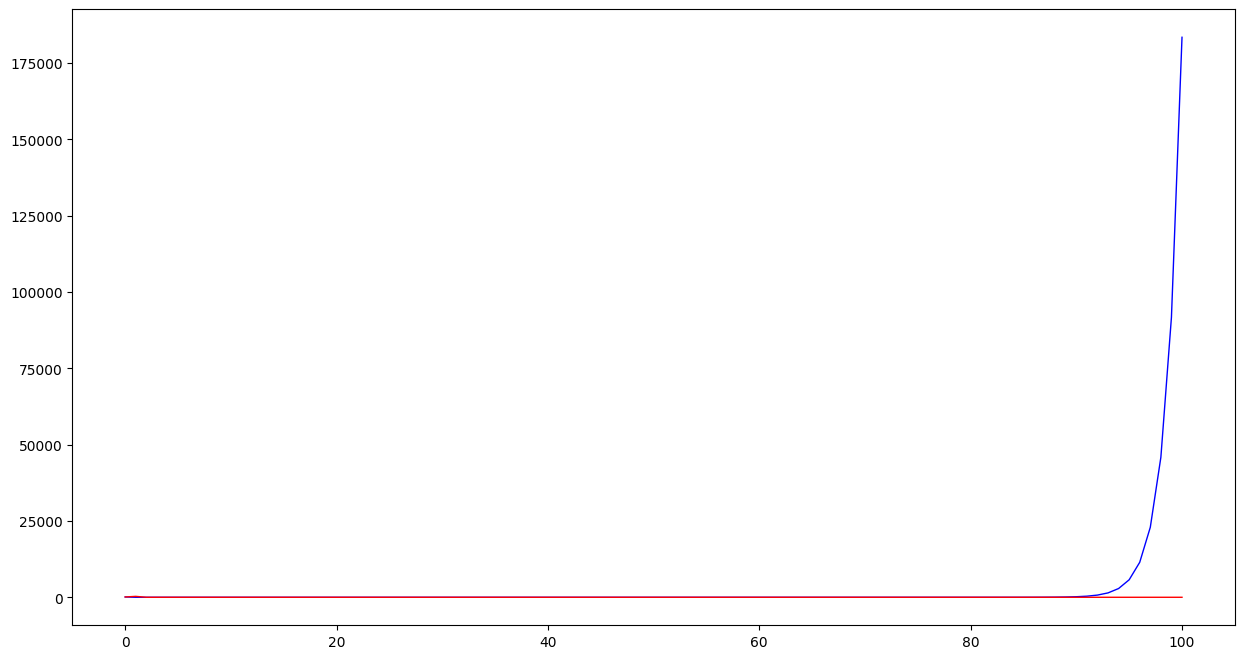

In [334]:
params = [[ 0.01, 2.0, 1.0, 100, 100],
          [0.001, 2.0, 1.4, 10,  10],
          [0.6, 10, .01, 100,  100],
          [0.16, 5, .40000115, 3,  1],
          [0.1545, 2, 3, 100,  100]]
# a b c x0, y0
num = 4
n = 100
x, y = ParasiteModel(n, params[num][0],  params[num][1], params[num][2], params[num][3], params[num][4])
#plt.yscale('log')
t = np.arange(n+1)
fig, ax = plt.subplots(figsize=(15, 8))
axes.grid(True, alpha=0.3)
plt.plot(t,x, "b", linewidth=1)
plt.plot(t,y, "r", linewidth=1)
plt.show()
